<a href="https://colab.research.google.com/github/Suganjustin/Suganjustin/blob/main/British%20Airways%20V%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df_list = []  # Initialize a list to store DataFrames for each page

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    rating = []
    category = []
    for para2 in parsed_content.find_all("div", {"class": "review-stats"}):
        for para3 in para2.find_all('td', {'class': 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]

        for para4 in para2.find_all('td', {'class': 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class': 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        # print(rating)

        for para6 in para2.find_all('td', {'class': 'review-rating-header'}):
            category.append(para6.get_text())

        # print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        # Append the DataFrame for the current page to the list
        df_list.append(pd.DataFrame([rating], columns=category))
        rating = []
        category = []

    print(f"   ---> {len(reviews)} total reviews")

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(df_list, ignore_index=True)


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [120]:
df.sample(5)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft
686,Couple Leisure,Business Class,London Heathrow to Preveza,May 2021,4.0,4.0,4.0,NaN,5.0,NaN,4,yes,A320
1,Solo Leisure,Business Class,London to Boston,August 2024,2.0,5.0,3.0,NaN,4.0,NaN,2,no,A380
737,Family Leisure,Economy Class,London to Marrakesh,August 2019,NaN,NaN,NaN,NaN,NaN,NaN,1,no,NaN
334,Business,Economy Class,Barcelona to London,March 2023,3.0,3.0,3.0,1.0,3.0,1.0,1,no,NaN
776,Solo Leisure,Economy Class,Mumbai to Boston via London,January 2020,2.0,5.0,5.0,2.0,1.0,1.0,3,yes,Boeing 777-200ER


In [121]:
df.to_csv("BA_reviews.csv", index=False)

In [122]:
df.shape

(1000, 13)

In [138]:
df['reviews'] = reviews

remove_text = ['✅ Trip Verified', 'Not Verified |']
for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'][i] = df['reviews'][i].replace(j,'')


<ipython-input-138-e1a550e67ab1>:7: ChainedAssignmentError: A value is trying to be set on a copy of a DataFrame or Series through chained assignment.
When using the Copy-on-Write mode, such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy.

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = df['reviews'][i].replace(j,'')


In [125]:
df.sample(5)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews
991,Couple Leisure,Business Class,London Heathrow to Larnaca,June 2019,4.0,5.0,5.0,NaN,5.0,NaN,5,yes,A320,| London Heathrow to Larnaca. Perfect. The e...
897,Couple Leisure,Business Class,London Heathrow to Austin,September 2019,4.0,4.0,4.0,1.0,4.0,NaN,4,yes,Boeing 747,| London Heathrow to Austin with British Airw...
539,Family Leisure,Business Class,Madrid to London Heathrow,April 2022,3.0,5.0,5.0,NaN,5.0,NaN,4,yes,A321 Neo,| I connected into Madrid on Iberia and wrote...
303,Couple Leisure,Business Class,NaN,May 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,NaN,| I booked business class tickets for my fia...
595,Solo Leisure,Business Class,Washington to London,December 2021,5.0,5.0,5.0,NaN,4.0,NaN,5,yes,NaN,| This past November/December I flew Washing...


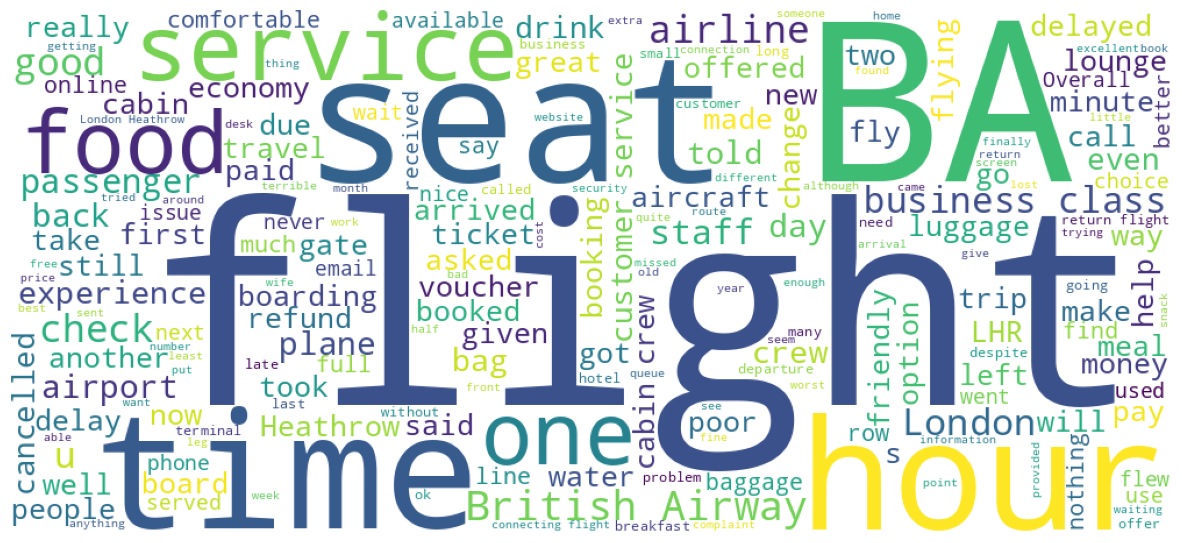

In [126]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

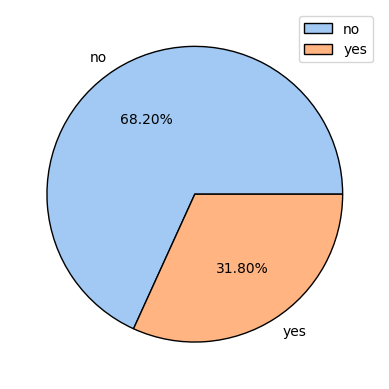

In [127]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

In [128]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,595.000000,586.000000,481.000000,333.000000,626.000000,216.000000,682.000000
mean,2.085714,2.404437,1.864865,2.204204,1.777955,1.537037,1.511730
std,1.104497,1.318604,1.070646,1.222424,1.164911,0.973375,0.818657
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [129]:
data = df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

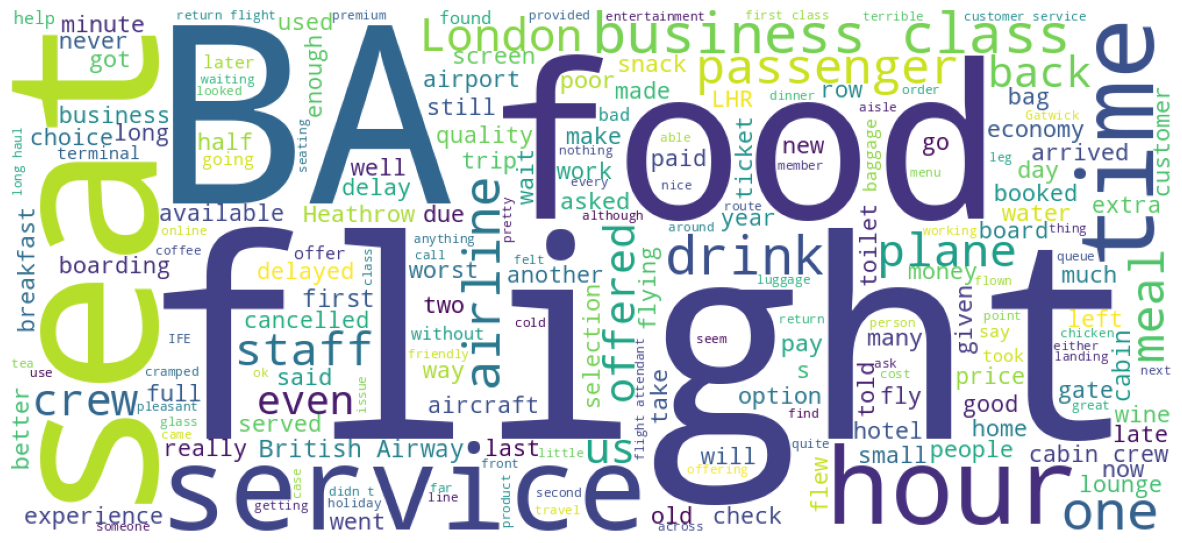

In [130]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [131]:
data = df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

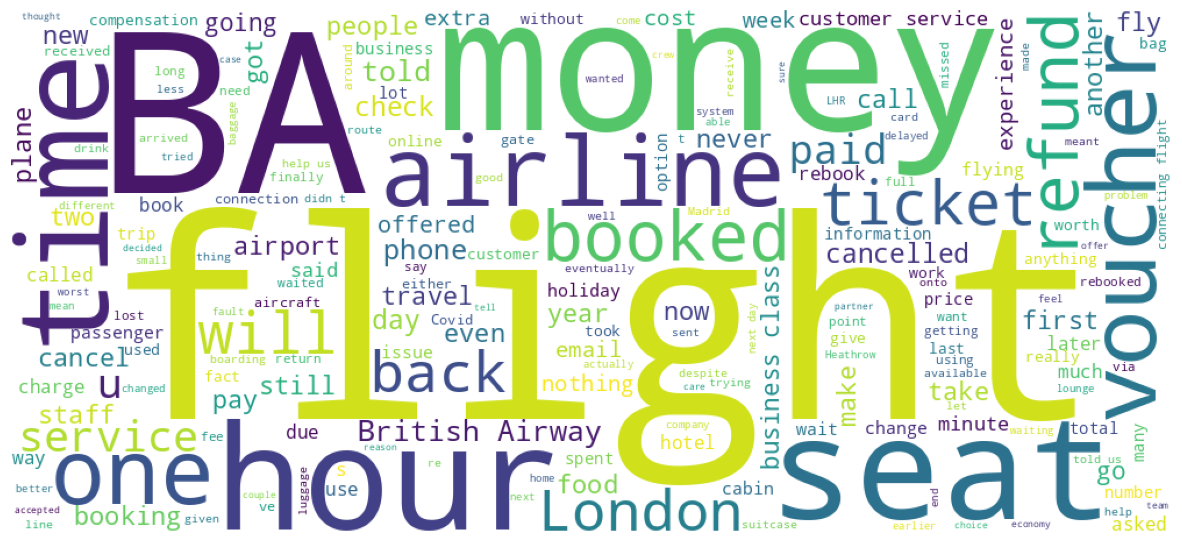

In [132]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

df.reviews = df.review.str.split('|', expand=True)[1]